# GTSRB Dataset CNN Model

In this project we are using the German Traffic Sign Recognition Baseline (GTSRB) dataset.  This dataset has been widely used by many research efforts and regarded as a benchmark dataset for traffic sign classification. The detailed specifications of the dataset is given below:

- 51,840 labelled images
- Separate train, test and validation data set
- 43 classes
- Image size is between 15 x 15 and 250 x 250 pixels
- Traffic signs may not be centered in the image
Annotations and images are separated; annotations are done in a csv that corresponds to the image file, and includes image size information

Citation: J. Stallkamp, M. Schlipsing, J. Salmen, and C. Igel, “Man vs. computer: Benchmarking machine learning algorithms for traffic sign recognition,” Neural Netw., vol. 32, pp. 323–332, Aug. 2012, doi: 10.1016/j.neunet.2012.02.016.

Our goal is to load this dataset, resize the images into a standard size, and create a CNN model that achieves the greatest score possible on the provided test set. 

# Data Loading

In [1]:
import matplotlib.pylab as plt
import numpy as np
import tensorflow as tf
import csv
import random 
from skimage import io, color, exposure, transform

NUM_CLASSES = 43
IMG_SIZE = 48

In [3]:
# Access Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Better copy data from Drive as an archive
zip_path = '/content/drive/MyDrive/645 - Group Assignments/GTSRB_Final.zip'

!cp "{zip_path}" .

!unzip -q GTSRB_Final.zip

# Remove .zip file after you unzip it
!rm GTSRB_Final.zip

# Make sure it's there
!ls

drive  GTSRB_Final  __MACOSX  sample_data


In [5]:
# File paths to different GTSRB data

fileTest = '/content/GTSRB_Final/Final_Test'
fileTrain = '/content/GTSRB_Final/Final_Training'
fileCSV = '/content/GTSRB_Final/GT-final_test.csv'

In [6]:
def preprocess_img(img):
    # Histogram normalization in y
    hsv = color.rgb2hsv(img)
    hsv[:,:,2] = exposure.equalize_hist(hsv[:,:,2])
    img = color.hsv2rgb(hsv)

    # central scrop
    min_side = min(img.shape[:-1])
    centre = img.shape[0]//2, img.shape[1]//2
    img = img[centre[0]-min_side//2:centre[0]+min_side//2,
              centre[1]-min_side//2:centre[1]+min_side//2,
              :]

    # rescale to standard size
    img = transform.resize(img, (IMG_SIZE, IMG_SIZE))

    # roll color axis to axis 0
    #img = np.rollaxis(img,-1)

    return img


def get_class(img_path):
    return int(img_path)

In [7]:
# function for reading the training images
# arguments: path to the traffic sign data, for example './GTSRB/Training'
# returns: list of images, list of corresponding labels 
def loadTrafficSignTraining(rootpath):
    '''Reads traffic sign data for German Traffic Sign Recognition Benchmark.

    Arguments: path to the traffic sign data, for example './GTSRB/Training'
    Returns:   list of images, list of corresponding labels'''
    images = [] # images
    labels = [] # corresponding labels
    # loop over all 42 classes
    for c in range(0,43):
        prefix = rootpath + '/' + format(c, '05d') + '/' # subdirectory for class
        gtFile = open(prefix + 'GT-'+ format(c, '05d') + '.csv') # annotations file
        gtReader = csv.reader(gtFile, delimiter=';') # csv parser for annotations file
        next(gtReader,None) # skip header
        print("Current iteration: "+ str(c))
        # loop over all images in current annotations file
        for row in gtReader:
            img = preprocess_img(plt.imread(prefix + row[0]))
            label = get_class(row[7])
            images.append(img) # the 1th column is the filename
            labels.append(label) # the 8th column is the label
        gtFile.close()
    return images, labels

In [8]:
# function for reading the test images
# arguments: path to the traffic sign data, for example './GTSRB/Test'
# returns: list of images, list of corresponding labels 
def loadTrafficSignTest(rootpath):
    '''Reads traffic sign data for German Traffic Sign Recognition Benchmark.

    Arguments: path to the traffic sign data, for example './GTSRB/Test'
    Returns:   list of images, list of corresponding labels'''
    images = [] # images
    labels = [] # corresponding labels
    prefix = rootpath + '/'
    gtFile = open(fileCSV) # annotations file
    gtReader = csv.reader(gtFile, delimiter=';') # csv parser for annotations file
    next(gtReader,None) # skip header
    # loop over all images in current annotations file
    for row in gtReader:
        img = preprocess_img(plt.imread(prefix + row[0]))
        label = get_class(row[7])
        images.append(img) # the 1th column is the filename
        labels.append(label) # the 8th column is the label
    gtFile.close()
    return images, labels

In [9]:
X_dev, Y_dev = loadTrafficSignTraining(fileTrain)

Current iteration: 0
Current iteration: 1
Current iteration: 2
Current iteration: 3
Current iteration: 4
Current iteration: 5
Current iteration: 6
Current iteration: 7
Current iteration: 8
Current iteration: 9
Current iteration: 10
Current iteration: 11
Current iteration: 12
Current iteration: 13
Current iteration: 14
Current iteration: 15
Current iteration: 16
Current iteration: 17
Current iteration: 18
Current iteration: 19
Current iteration: 20
Current iteration: 21
Current iteration: 22
Current iteration: 23
Current iteration: 24
Current iteration: 25
Current iteration: 26
Current iteration: 27
Current iteration: 28
Current iteration: 29
Current iteration: 30
Current iteration: 31
Current iteration: 32
Current iteration: 33
Current iteration: 34
Current iteration: 35
Current iteration: 36
Current iteration: 37
Current iteration: 38
Current iteration: 39
Current iteration: 40
Current iteration: 41
Current iteration: 42


In [10]:
X_test, Y_test = loadTrafficSignTest(fileTest)

# Data Exploration

In [10]:
# General information
print("Development set")
print("Images: ",len(X_dev))
print("Labels shape:",len(Y_dev))
print("\nNumber of classes:",np.unique(Y_dev).size)
print("\nClasses:",np.unique(Y_dev))
print("\nTest set")
print("Images: ",len(X_test))
print("Labels shape: ",len(Y_test))

Development set
Images:  39209
Labels shape: 39209

Number of classes: 43

Classes: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42]

Test set
Images:  12630
Labels shape:  12630


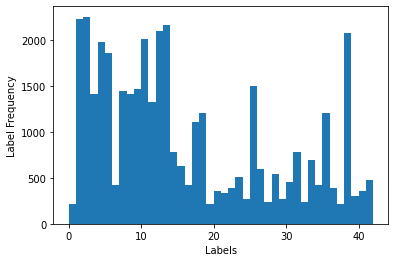

In [11]:
# Histogram of class distribution
plt.figure()
plt.hist(Y_dev, bins = range(43))
plt.xlabel("Labels")
plt.ylabel("Label Frequency")
plt.show()

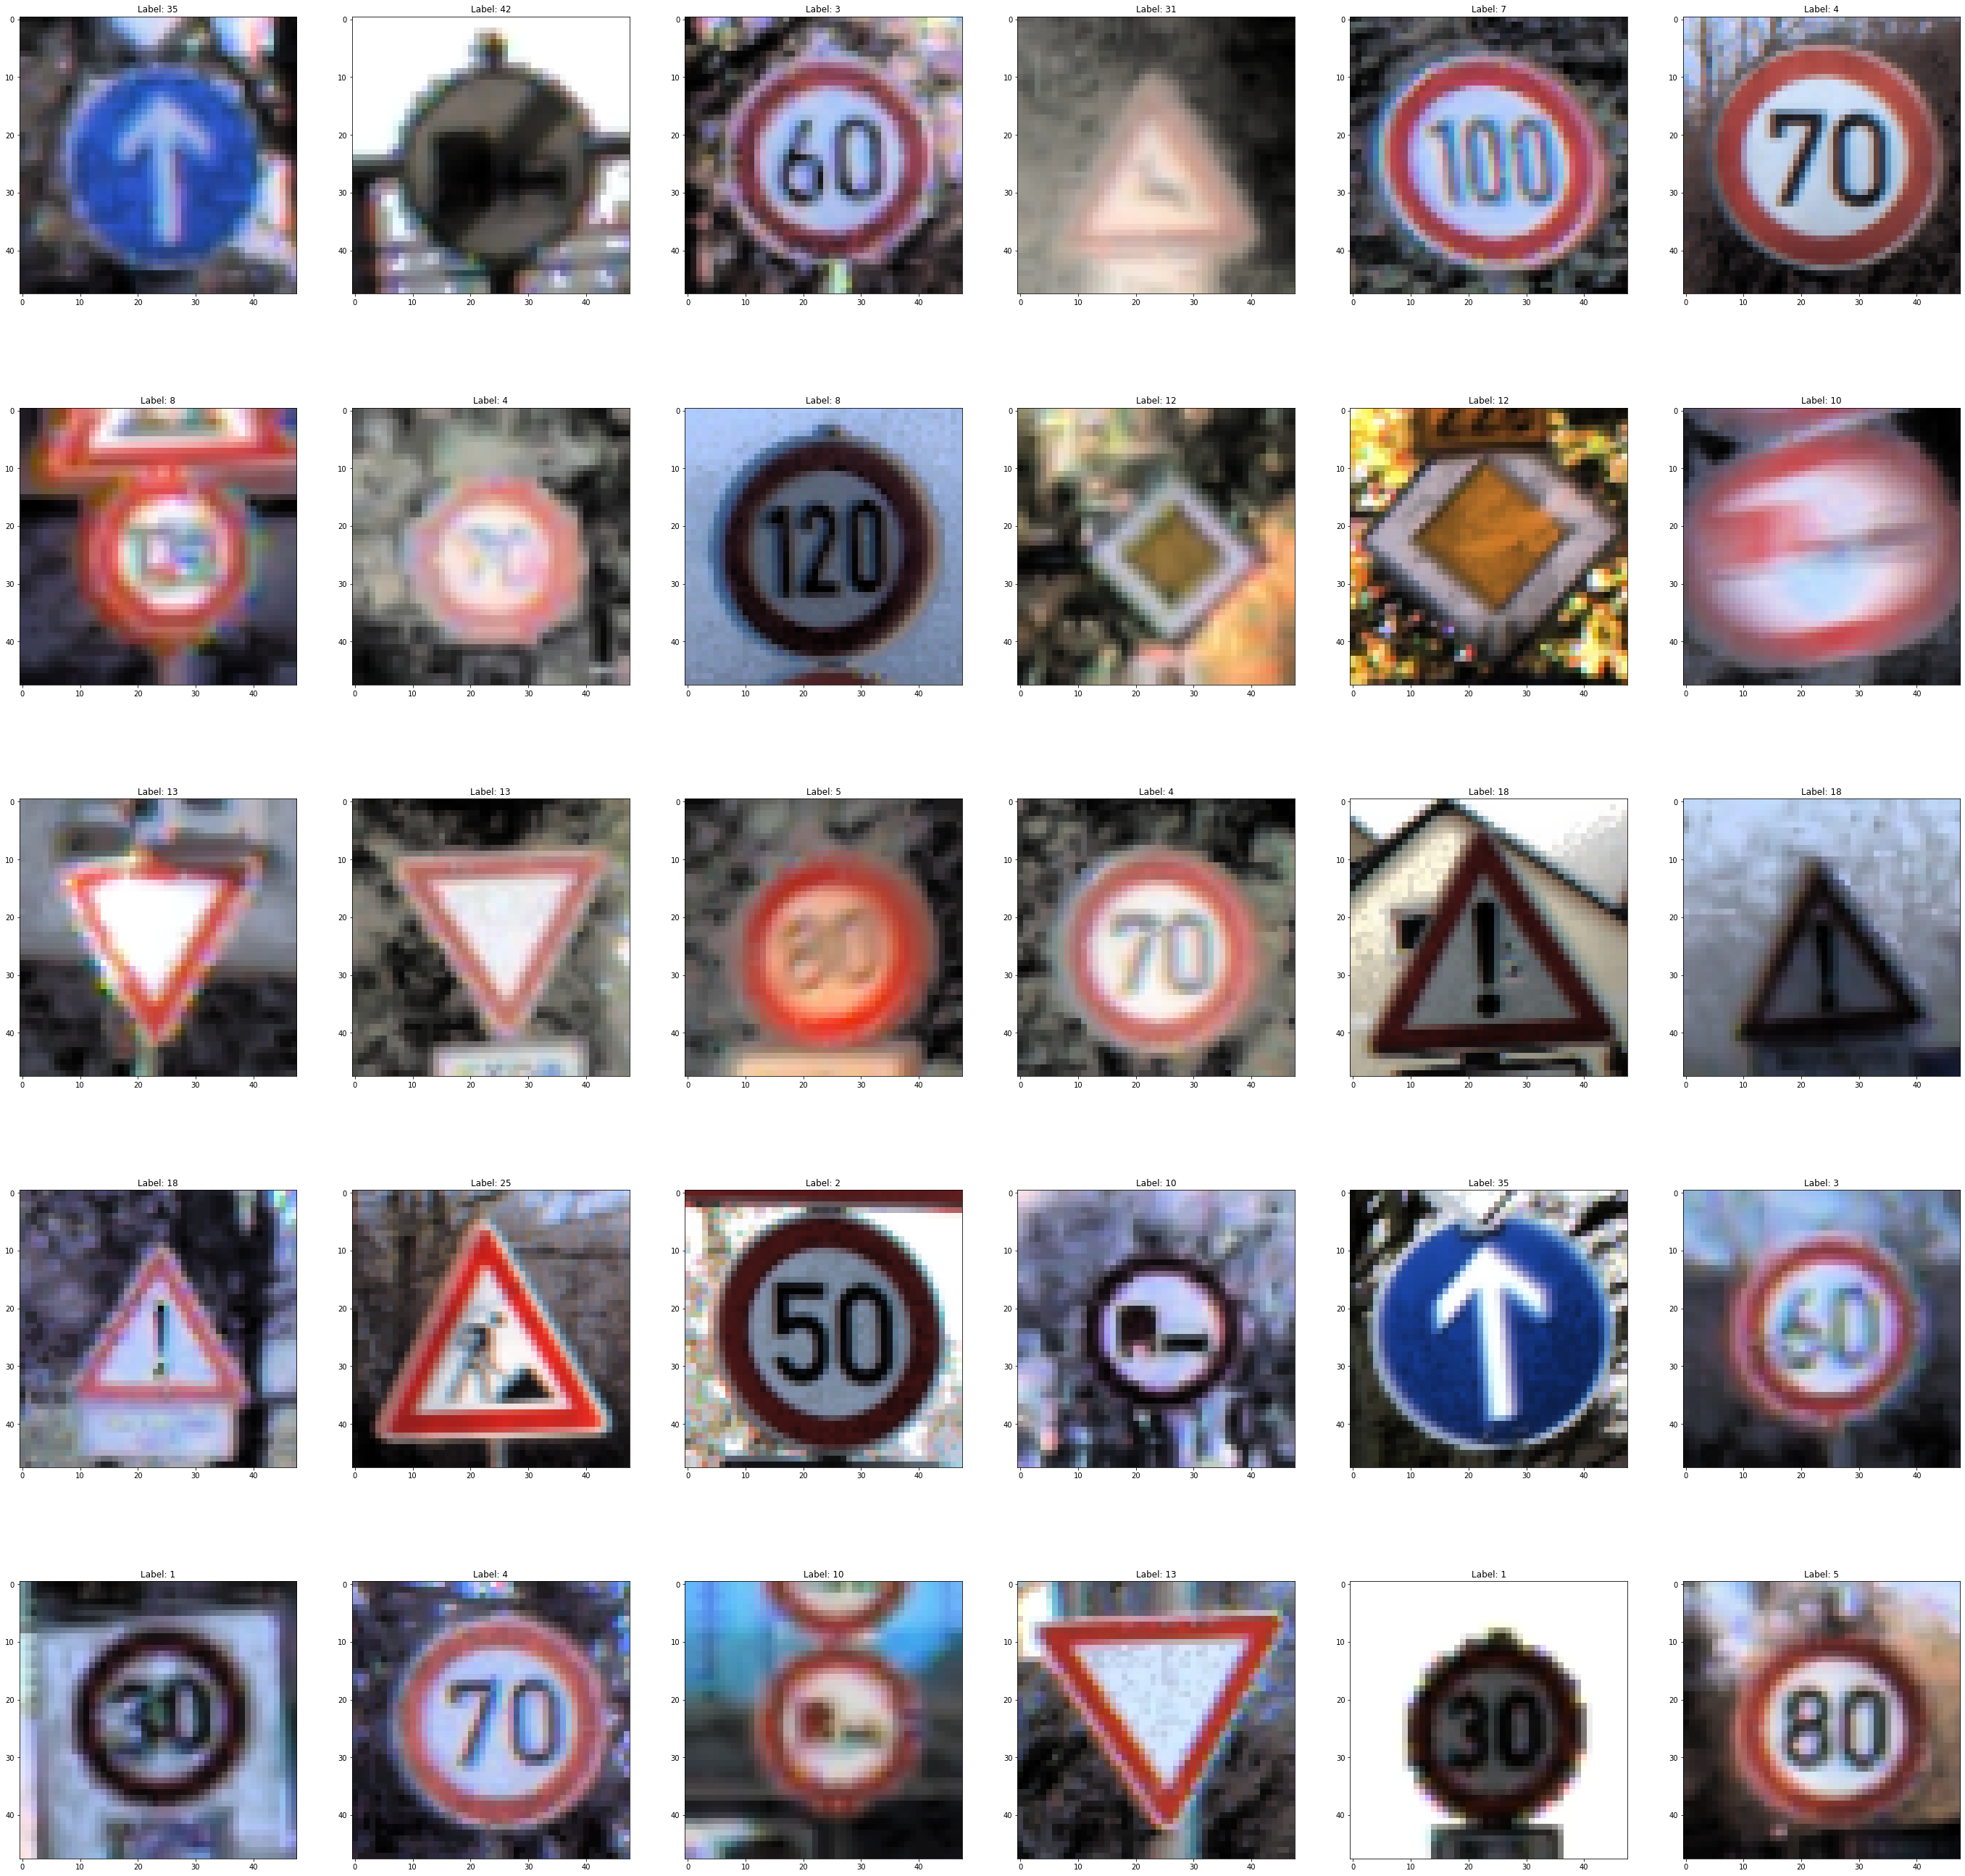

In [12]:
# Disaplying some samples from the development set
sample_indexes = np.random.choice(np.arange(len(X_dev), dtype = int),size = 30, replace = False)
plt.figure(figsize = (48,48))
for (ii,jj) in enumerate(sample_indexes):
    plt.subplot(5,6,ii+1)
    plt.imshow(X_dev[jj], cmap = "gray")
    plt.title("Label: %d" %Y_dev[jj])
plt.show()

# Data Preparation

In [11]:
#The number of classes across samples looks unbalanced
# Let's shuffle the samples and split them
temp = list(zip(X_dev, Y_dev)) 
random.shuffle(temp) 
X_dev, Y_dev = zip(*temp) 

nsplit = int(0.75*len(X_dev)) # Train/validation split

# Train and validation split
X_train = X_dev[:nsplit]
Y_train = Y_dev[:nsplit]
X_val = X_dev[nsplit:]
Y_val = Y_dev[nsplit:]

X_train = np.asarray(X_train)
X_val = np.asarray(X_val)
X_test = np.asarray(X_test)

print("Train set")
print("Images: ", X_train.shape)
print("Labels shape:",len(Y_train))
print("\nValidation set")
print("Images: ", X_val.shape)
print("Labels shape: ",len(Y_val))

Train set
Images:  (29406, 48, 48, 3)
Labels shape: 29406

Validation set
Images:  (9803, 48, 48, 3)
Labels shape:  9803


In [14]:
print(X_train.min(),X_train.max(),X_train.mean(),X_train.std())
print(X_val.min(),X_val.max(),X_val.mean(),X_val.std())

0.0 1.0000000000000004 0.45464276336451337 0.2774807923236597
0.0 1.0000000000000004 0.4539344140129936 0.27685675269637233


In [12]:
# Create one hot encoded data:

Y_train_oh = tf.keras.utils.to_categorical(Y_train)
Y_val_oh = tf.keras.utils.to_categorical(Y_val)
Y_test_oh = tf.keras.utils.to_categorical(Y_test)

print("Labels:")
print(Y_train[:5])
print()
print("One hot encoded labels:")
print(Y_train_oh[:5])

Labels:
(42, 2, 26, 14, 33)

One hot encoded labels:
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


# Data Augmentation

In [13]:
"""
Default params:
gen_params = {"featurewise_center":False,
              "samplewise_center":False,
              "featurewise_std_normalization":False,
              "samplewise_std_normalization":False,
              "zca_whitening":False, 
              "rotation_range":10, 
              "width_shift_range":0.1,
              "height_shift_range":0.1,
              "shear_range":0.2, # 0.1 = 0.9737 0.3 = 0.9737
              "zoom_range":0.1,
              "horizontal_flip":False,
              "fill_mode":'constant', #constant is default, 'wrap'
               "cval": 0}

From these defaults, tests accuracies achieved the following:
0.97339 for default
0.9589 for 10 rotation and 'wrap'
0.9722 for 15 rotation with a larger model
0.9679 for 15 rotation and regular model
0.9714 for 5 rotatio with regular model
0.9731 for defaults with a larger model
0.9710 for 12 rotation with regular model
0.97537 for 11 rotation with regular model
0.97054 for 11 rotation with larger model
0.9722 for 11 rotation with 'nearest' fill mode
0.97181 for 11 rotation with regular model with all 0.1 set to 0.05 with 'nearest'
0.9658 for 11 rotation with regular model with all 0.1 set to 0.15 with 'constant'
0.97545 for 10 rotation with all 0.1 and 0.2 set to 0 - best
"""
gen_params = {"featurewise_center":False,
              "samplewise_center":False,
              "featurewise_std_normalization":False,
              "samplewise_std_normalization":False,
              "zca_whitening":False, #change to True = 0.0148 for the train set
              "rotation_range":10, 
              "width_shift_range":0,
              "height_shift_range":0,
              "shear_range":0, # 0.1 = 0.9737 and 0.3 = 0.9737
              "zoom_range":0,
#              "brightness_range":[0.8,1.2], # this resulted in 0.0166 for test
              "horizontal_flip":False,
              "fill_mode":'constant', #constant is default, 'wrap'
               "cval": 0}

train_gen = tf.keras.preprocessing.image.ImageDataGenerator(**gen_params)
val_gen = tf.keras.preprocessing.image.ImageDataGenerator(**gen_params)

train_gen.fit(X_train,seed = 1)
val_gen.fit(X_val, seed = 1)

# set your batch size
batch_size = 32

train_flow = train_gen.flow(X_train,Y_train_oh,batch_size = batch_size)
val_flow = val_gen.flow(X_val,Y_val_oh,batch_size = batch_size) 


0.42382967 0.28359708
0.0 1.0


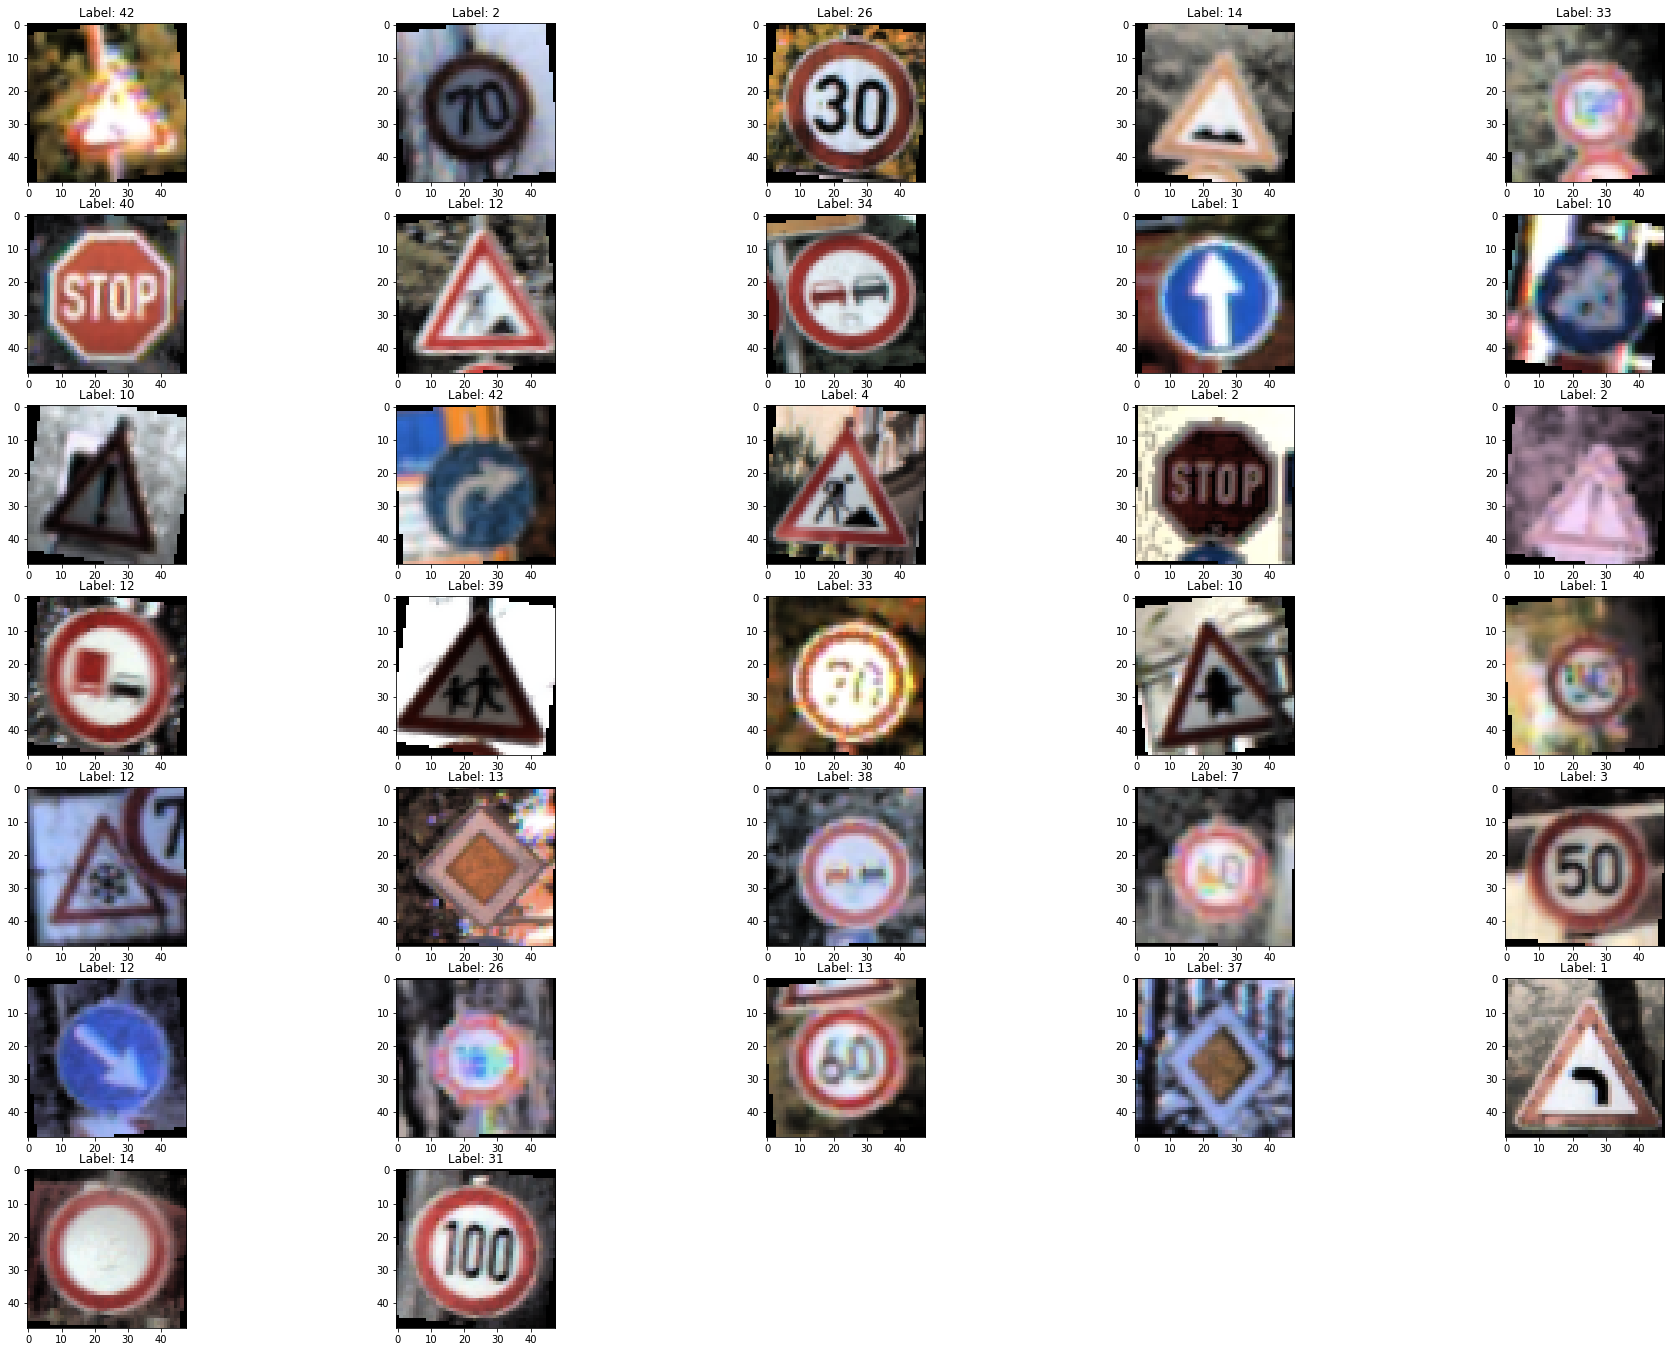

In [14]:
# Disaplying some samples from the augmented samples
plt.figure(figsize = (32,24))
Xbatch,Ybatch = train_flow.__getitem__(0)
print(Xbatch.mean(),Xbatch.std())
print(Xbatch.min(),Xbatch.max())
for ii in range(batch_size):
    plt.subplot(7,5,ii+1)
    plt.imshow((Xbatch[ii]- Xbatch[ii].min())/(Xbatch.max() - Xbatch[ii].min()), cmap = "gray")
    plt.title("Label: %d" %Y_dev[ii])
del Y_train, X_dev, Y_dev
plt.show()

# Model Run with No Data Augmentation

In [15]:
"""
CNN Model based off the midterm one, with our standardized input files to 48 by 48 pixels, with 3 (RGB) colour values. The model consists of 3 convolution layer sets, with 576 kernels, 288 kernels, and 144 kernels. Each of these layer sets uses a 3 by 3 kernel size, and is separated by a 2 by 2 max pooling layer and batch normalization (to recenter the input). There is a single fully connected layer with 348 kernels, which connects to the final 43 class output layer that uses softmax activation (all others use relu, and have a 'he_uniform' initializer).
Our incrementing dropout coefficients and L2 kernel regularizations were the result of many iterations of testing, and proved to be the most effective to combat overfitting. They work out to a range of 0.2-0.5 for the dropout, and 0.1-0.4 for the L2 regularizer. The optimizer (SGD with 0.9 momentum) was also experimentally determined. 

"""
def my_model(ishape = (48,48,3),k = 43, lr = 1e-4):
    model_input = tf.keras.layers.Input(shape = ishape)
    l1 = tf.keras.layers.Conv2D(576, (3,3), padding='same', kernel_initializer='he_uniform', kernel_regularizer=tf.keras.regularizers.l2(lr*1000), activation='relu')(model_input) #576
    l1_batch = tf.keras.layers.BatchNormalization()(l1)
    l2 = tf.keras.layers.Conv2D(576, (3,3), padding='same',kernel_initializer='he_uniform',  kernel_regularizer=tf.keras.regularizers.l2(lr*1000), activation='relu')(l1_batch) 
    l2_batch = tf.keras.layers.BatchNormalization()(l2)
    l2_drop = tf.keras.layers.Dropout(0.2)(l2_batch)
    l3 = tf.keras.layers.MaxPool2D((2,2))(l2_drop)
    l4 = tf.keras.layers.Conv2D(288, (3,3), padding='same',kernel_initializer='he_uniform',  kernel_regularizer=tf.keras.regularizers.l2(lr*2000),activation='relu')(l3) #288
    l4_batch = tf.keras.layers.BatchNormalization()(l4)
    l5 = tf.keras.layers.Conv2D(288, (3,3), padding='same', kernel_initializer='he_uniform', kernel_regularizer=tf.keras.regularizers.l2(lr*2000),activation='relu')(l4) 
    l5_batch = tf.keras.layers.BatchNormalization()(l5)
    l5_drop = tf.keras.layers.Dropout(0.3)(l5_batch)
    l6 = tf.keras.layers.MaxPool2D((2,2))(l5_drop)
    l7 = tf.keras.layers.Conv2D(144, (3,3), padding='same',kernel_initializer='he_uniform',  kernel_regularizer=tf.keras.regularizers.l2(lr*3000),activation='relu')(l6)
    l7_batch = tf.keras.layers.BatchNormalization()(l7)
    l8 = tf.keras.layers.Conv2D(144, (3,3), padding='same',kernel_initializer='he_uniform', kernel_regularizer=tf.keras.regularizers.l2(lr*3000), activation='relu')(l7_batch)
    l8_batch = tf.keras.layers.BatchNormalization()(l8)
    l8_drop = tf.keras.layers.Dropout(0.4)(l8_batch)
    flat = tf.keras.layers.Flatten()(l8_drop)
    prep_out = tf.keras.layers.Dense(348,activation = 'relu', kernel_initializer='he_uniform', kernel_regularizer=tf.keras.regularizers.l2(lr*4000),)(flat)    
    out_drop = tf.keras.layers.Dropout(0.5)(prep_out)
    out = tf.keras.layers.Dense(k,activation = 'softmax')(out_drop)
    model = tf.keras.models.Model(inputs = model_input, outputs = out)
    model.compile(optimizer=tf.keras.optimizers.SGD(lr=lr, momentum=0.9), loss='categorical_crossentropy', metrics = ["accuracy"])

    return model

In [19]:
model = my_model()
print(model.summary())

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 48, 48, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 48, 48, 576)       16128     
_________________________________________________________________
batch_normalization (BatchNo (None, 48, 48, 576)       2304      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 48, 48, 576)       2986560   
_________________________________________________________________
batch_normalization_1 (Batch (None, 48, 48, 576)       2304      
_________________________________________________________________
dropout (Dropout)            (None, 48, 48, 576)       0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 576)       0     

In [ ]:
model_name = "no_augment_model_gtsrb_cnn.h5"
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience = 10)

monitor = tf.keras.callbacks.ModelCheckpoint(model_name, monitor='val_loss',\
                                             verbose=0,save_best_only=True,\
                                             save_weights_only=True,\
                                             mode='min')
# Learning rate schedule
def scheduler(epoch, lr):
    if epoch%10 == 0:
        lr = lr/2
    return lr

lr_schedule = tf.keras.callbacks.LearningRateScheduler(scheduler,verbose = 0)

In [ ]:
model.fit(X_train,Y_train_oh,batch_size = 32, epochs = 200, verbose = 1, callbacks= [early_stop, monitor, lr_schedule],validation_data=(X_val,Y_val_oh))

Epoch 1/200
919/919 [==============================] - 87s 94ms/step - loss: 823.9777 - accuracy: 0.1823 - val_loss: 587.3560 - val_accuracy: 0.6204
Epoch 2/200
919/919 [==============================] - 86s 94ms/step - loss: 531.8207 - accuracy: 0.5706 - val_loss: 392.7889 - val_accuracy: 0.8424
Epoch 3/200
919/919 [==============================] - 86s 94ms/step - loss: 359.1721 - accuracy: 0.7745 - val_loss: 273.7407 - val_accuracy: 0.9229
Epoch 4/200
919/919 [==============================] - 86s 94ms/step - loss: 252.4603 - accuracy: 0.8884 - val_loss: 197.6542 - val_accuracy: 0.9610
Epoch 5/200
919/919 [==============================] - 86s 94ms/step - loss: 183.6201 - accuracy: 0.9372 - val_loss: 146.9726 - val_accuracy: 0.9756
Epoch 6/200
919/919 [==============================] - 86s 94ms/step - loss: 137.3294 - accuracy: 0.9641 - val_loss: 111.8685 - val_accuracy: 0.9819
Epoch 7/200
919/919 [==============================] - 86s 94ms/step - loss: 105.0219 - accuracy: 0.9765 -

In [ ]:
# model accuracy for the non- augmented data:
model.load_weights(model_name) 
metrics = model.evaluate(X_test,Y_test_oh)
print("Categorical cross-entropy:", metrics[0])
print("Accuracy:", metrics[1])

395/395 [==============================] - 10s 25ms/step - loss: 6.3298 - accuracy: 0.9769
Categorical cross-entropy: 6.3297624588012695
Accuracy: 0.9768804311752319


# Model Run with Augmented Data

In [16]:
model = my_model() # reset the model for the augmented data run


In [17]:
model_name = "augment_model_gtsrb_cnn.h5" #new model name, all other parameters are the same
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience = 10)

monitor = tf.keras.callbacks.ModelCheckpoint(model_name, monitor='val_loss',\
                                             verbose=0,save_best_only=True,\
                                             save_weights_only=True,\
                                             mode='min')
# Learning rate schedule
def scheduler(epoch, lr):
    if epoch%10 == 0:
        lr = lr/2
    return lr

lr_schedule = tf.keras.callbacks.LearningRateScheduler(scheduler,verbose = 0)

In [18]:
from matplotlib import pyplot as plt
history = model.fit(train_flow, batch_size = 32, epochs = 200, verbose = 1, callbacks= [early_stop, monitor, lr_schedule],validation_data=val_flow)


Epoch 1/200
919/919 [==============================] - 111s 100ms/step - loss: 825.5235 - accuracy: 0.1518 - val_loss: 588.6992 - val_accuracy: 0.5588
Epoch 2/200
919/919 [==============================] - 88s 96ms/step - loss: 533.1236 - accuracy: 0.5060 - val_loss: 393.8203 - val_accuracy: 0.7564
Epoch 3/200
919/919 [==============================] - 88s 95ms/step - loss: 360.1346 - accuracy: 0.7244 - val_loss: 274.5094 - val_accuracy: 0.8667
Epoch 4/200
919/919 [==============================] - 88s 95ms/step - loss: 253.1781 - accuracy: 0.8606 - val_loss: 198.2493 - val_accuracy: 0.9279
Epoch 5/200
919/919 [==============================] - 88s 95ms/step - loss: 184.1642 - accuracy: 0.9230 - val_loss: 147.4341 - val_accuracy: 0.9468
Epoch 6/200
919/919 [==============================] - 88s 95ms/step - loss: 137.7572 - accuracy: 0.9553 - val_loss: 112.2523 - val_accuracy: 0.9601
Epoch 7/200
919/919 [==============================] - 88s 95ms/step - loss: 105.3622 - accuracy: 0.9718

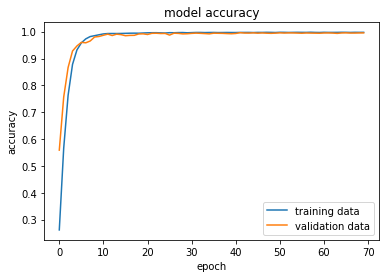

In [20]:
# Plot the model accuracy over epochs
plt.plot(history.history['accuracy'][0:70])
plt.plot(history.history['val_accuracy'][0:70])
plt.title('model accuracy') #,fontsize=20
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training data', 'validation data'], loc='lower right')
plt.show()

In [21]:
model.load_weights(model_name)
metrics = model.evaluate(X_test,Y_test_oh)
print("Categorical cross-entropy:", metrics[0])
print("Accuracy:", metrics[1])

395/395 [==============================] - 12s 30ms/step - loss: 6.3480 - accuracy: 0.9755
Categorical cross-entropy: 6.348036766052246
Accuracy: 0.9754552841186523


310


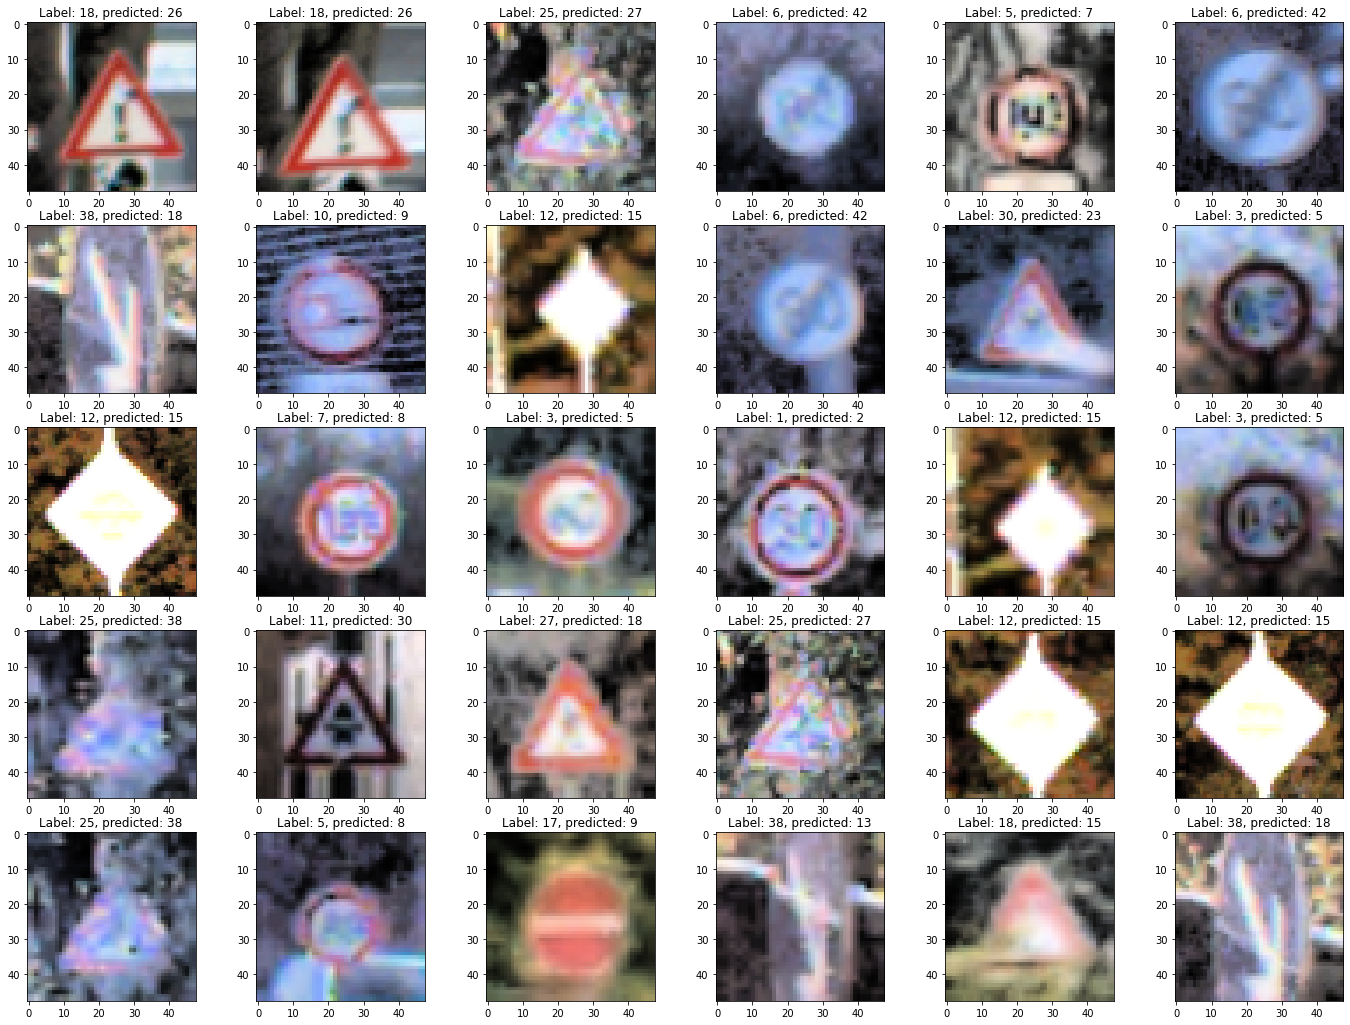

In [22]:
# Display some incorrectly classified images

Ypred = model.predict(X_test).argmax(axis = 1)
wrong_indexes = np.where(Ypred != Y_test)[0]
print(wrong_indexes.size)

sample_indexes = np.random.choice(np.arange(wrong_indexes.shape[0], dtype = int),size = 30, replace = False)
plt.figure(figsize = (24,18))
for (ii,jj) in enumerate(sample_indexes):
    plt.subplot(5,6,ii+1)
    plt.imshow(X_test[wrong_indexes[jj]], cmap = "gray")
    plt.title("Label: %d, predicted: %d" %(Y_test[wrong_indexes[jj]],Ypred[wrong_indexes[jj]]))
plt.show()